In [1]:
import matplotlib.pyplot as plt
import pystac_client

from mccn._types import FilterConfig, ProcessConfig
from mccn.extent import GeoBoxBuilder
from mccn.parser import parse_item, band_filter
from mccn.loader.raster import RasterLoader

client = pystac_client.Client.open("http://203.101.230.81:8082")

In [4]:
rea_collection = client.get_collection("rea")
items = [parse_item(item) for item in rea_collection.get_items(recursive=True)]
pitems = []
bands = None
for item in items:
    pitem = band_filter(item, bands)
    if pitem:
        pitems.append(pitem)

rea_loader = RasterLoader(
    pitems,
    filter_config=FilterConfig(GeoBoxBuilder.from_collection(rea_collection, 1000)),
)
rea_ds = rea_loader.load()
rea_ds

<xarray.Dataset> Size: 8MB
Dimensions:      (lat: 1000, lon: 1000, time: 1)
Coordinates:
  * lat          (lat) float64 8kB -37.54 -37.54 -37.54 ... -38.0 -38.0 -38.0
  * lon          (lon) float64 8kB 144.4 144.4 144.4 144.4 ... 145.0 145.0 145.0
    spatial_ref  int32 4B 4326
  * time         (time) datetime64[ns] 8B 2024-12-31T14:20:00
Data variables:
    price        (time, lat, lon) float32 4MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    price_usd    (time, lat, lon) float32 4MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0

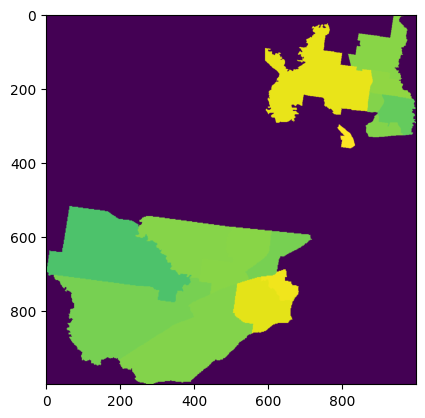

In [5]:
plt.imshow(rea_ds.price.values[0, :, :])
plt.show()

### OZBarley Raster

In [6]:
ozbarley_collection = client.get_collection("ozbarley_raster")
items = [parse_item(item) for item in ozbarley_collection.get_items(recursive=True)]
pitems = []
bands = None
for item in items:
    pitem = band_filter(item, bands)
    if pitem:
        pitems.append(pitem)

ozbarley_loader = RasterLoader(
    pitems,
    filter_config=FilterConfig(
        GeoBoxBuilder.from_collection(ozbarley_collection, 1000)
    ),
    process_config=ProcessConfig(rename_bands={"r": "red", "g": "green", "b": "blue"}),
)
ozbarley_ds = ozbarley_loader.load()
ozbarley_ds

<xarray.Dataset> Size: 48MB
Dimensions:      (lat: 1000, lon: 1000, time: 3)
Coordinates:
  * lat          (lat) float64 8kB -35.05 -35.05 -35.05 ... -35.05 -35.05 -35.05
  * lon          (lon) float64 8kB 147.3 147.3 147.3 147.3 ... 147.3 147.3 147.3
  * time         (time) datetime64[ns] 24B 2024-08-05T23:55:00 ... 2024-10-09...
    spatial_ref  int32 4B 4326
Data variables:
    blue         (time, lat, lon) float32 12MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    green        (time, lat, lon) float32 12MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    red          (time, lat, lon) float32 12MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    dsm          (time, lat, lon) float32 12MB nan nan nan nan ... 0.0 0.0 0.0

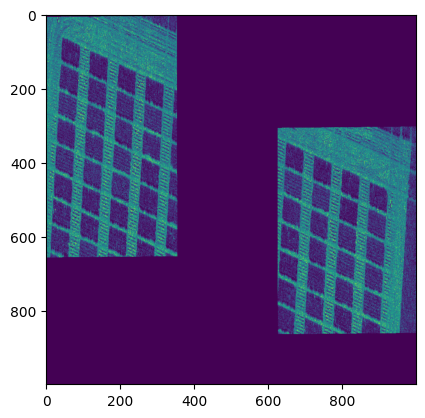

In [7]:
plt.imshow(ozbarley_ds.red.values[0, :, :])
plt.show()

### Llara Campey Raster

In [2]:
from mccn.loader.raster import RasterLoadConfig


llara_campey_collection = client.get_collection("llara_campey_raster")
items = [parse_item(item) for item in llara_campey_collection.get_items(recursive=True)]
pitems = []
bands = None
for item in items:
    pitem = band_filter(item, bands)
    if pitem:
        pitems.append(pitem)

llara_campey_loader = RasterLoader(
    pitems,
    filter_config=FilterConfig(
        GeoBoxBuilder.from_collection(llara_campey_collection, 100)
    ),
    load_config=RasterLoadConfig(dtype="uint16"),
)
llara_campey_ds = llara_campey_loader.load()
llara_campey_ds

<xarray.Dataset> Size: 42kB
Dimensions:      (lat: 100, lon: 100, time: 1)
Coordinates:
  * lat          (lat) float64 800B -30.25 -30.25 -30.26 ... -30.29 -30.29
  * lon          (lon) float64 800B 149.8 149.8 149.8 ... 149.9 149.9 149.9
    spatial_ref  int32 4B 4326
  * time         (time) datetime64[ns] 8B 2015-12-31T23:55:00
Data variables:
    gamma_k      (time, lat, lon) uint16 20kB 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0
    eca          (time, lat, lon) uint16 20kB 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0

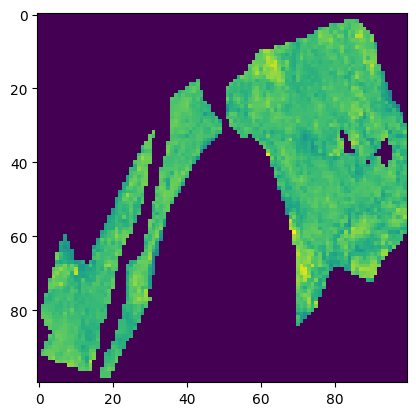

In [3]:
plt.imshow(llara_campey_ds.eca.values[0, :, :])
plt.show()